In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
special_files = ["bitcoin_dataset.csv", "ethereum_dataset.csv"]


def right_columns(num, index):
    nums = [0, 1, 3, 21, 24] if index == 0 else [0, 2, 6, 19]
    return num not in nums

def right_title_col(index):
    return ['Date','High', 'Market Cap', 'Volume', 'Type'] if index == 0 \
        else ['Date', 'High','Market Cap', 'Type']
    

    
# Read standard files
dataframes = [ pd.read_csv(os.path.join('data',f)).assign(Type=f.split('_')[0]) \
              for f in os.listdir('data') if f not in special_files ]


# Read and clean special files
for index, file in enumerate(special_files):
    d = pd.read_csv(os.path.join('data',file)).assign(Type=file.split('_')[0])
    index_col = [ i for i in range(len(d.columns)) if right_columns(i, index) ]
    d.drop(d.columns[index_col], 1, inplace=True)
    d.columns = right_title_col(index)

    d['Low'] = d['High']
    d['Open'] = d['High']
    d['Close'] = d['High']

    dataframes.append(d)

    
ds = pd.concat(dataframes, ignore_index=True)
ds.fillna(0, inplace=True)

In [3]:
ds.shape

(13255, 8)

In [4]:
ds.head(20)

,Close,Date,High,Low,Market Cap,Open,Type,Volume
0,327.23,"Sep 05, 2017",333.83,286.53,"2,388,710,000",316.88,dash,"53,928,800"
1,316.13,"Sep 04, 2017",357.21,301.84,"2,689,920,000",356.94,dash,"44,170,200"
2,356.39,"Sep 03, 2017",373.08,338.23,"2,670,270,000",354.63,dash,"34,945,200"
3,350.17,"Sep 02, 2017",395.92,329.27,"2,962,400,000",393.53,dash,"54,813,400"
4,393.35,"Sep 01, 2017",393.35,376.34,"2,844,110,000",377.92,dash,"55,440,700"
5,378.32,"Aug 31, 2017",380.34,368.18,"2,773,030,000",368.57,dash,"34,978,600"
6,368.34,"Aug 30, 2017",375.70,358.69,"2,704,790,000",359.59,dash,"44,586,300"
7,359.55,"Aug 29, 2017",367.34,354.49,"2,685,760,000",357.16,dash,"50,014,900"
8,356.78,"Aug 28, 2017",369.19,351.24,"2,725,220,000",362.50,dash,"57,630,700"
9,362.89,"Aug 27, 2017",400.63,358.23,"3,009,530,000",400.42,dash,"121,516,000"


In [5]:
ds.describe()

,Close,High,Low,Open
count,13255.000000,13255.000000,13255.000000,13255.000000
mean,131.954413,134.440004,128.928637,131.581465
std,398.927146,406.060234,389.170530,397.260404
min,0.000000,0.000000,0.000000,0.000000
25%,0.239544,0.254182,0.225143,0.238138
50%,3.590000,3.680000,3.470000,3.580000
75%,34.785000,36.925000,31.360000,34.555000
max,4892.010000,4975.040000,4748.255000,4901.420000


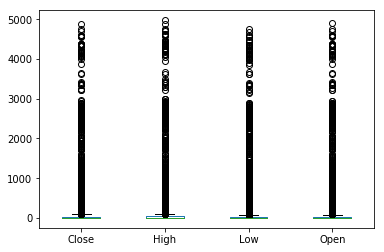

In [7]:
import matplotlib.pyplot as plt

ds.plot(kind='box')
plt.show()

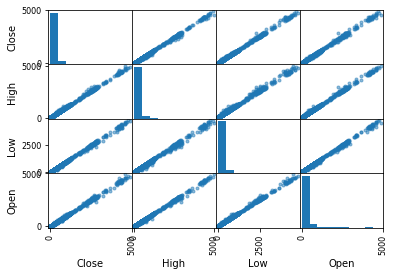

In [8]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(ds)
plt.show()

In [9]:
import sklearn.cluster as cluster
import numpy as np
import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [10]:
ds["Type"].value_counts()

bitcoin       3221
ethereum      1939
litecoin      1592
ripple        1494
dash          1300
monero        1203
nem            889
waves          461
stratis        390
neo            362
bitconnect     229
iota            85
omisego         30
numeraire       30
qtum            30
Name: Type, dtype: int64

In [11]:
ds.replace({"Type":{"bitcoin":0, "litecoin":1, "ripple":2, "dash":3, "monero":4, "ethereum":5, "nem":6, "waves":7, "stratis":8, "neo":9, "bitconnect":10, "iota":11, "qtum":12, "numeraire":13, "omisego":14}}, inplace=True)

In [12]:
ds["Type"].value_counts()

0     3221
5     1939
1     1592
2     1494
3     1300
4     1203
6      889
7      461
8      390
9      362
10     229
11      85
14      30
13      30
12      30
Name: Type, dtype: int64

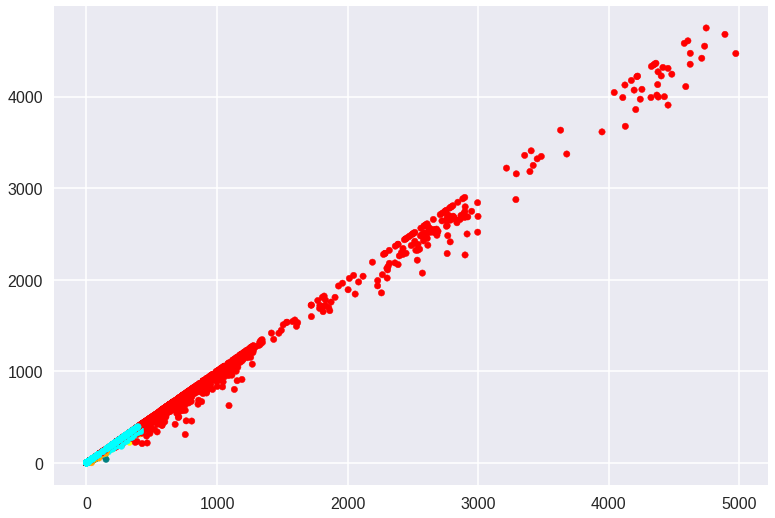

In [13]:
colors = np.array(['red','blue','green', 'yellow', 'orange', 'cyan', 'pink', 'purple', 'black', 'grey', 'teal', 'brown', 'navy', 'teal', 'lime'])
plt.scatter(ds['High'], ds['Low'], c=colors[ds['Type']], s=40)
plt.show()

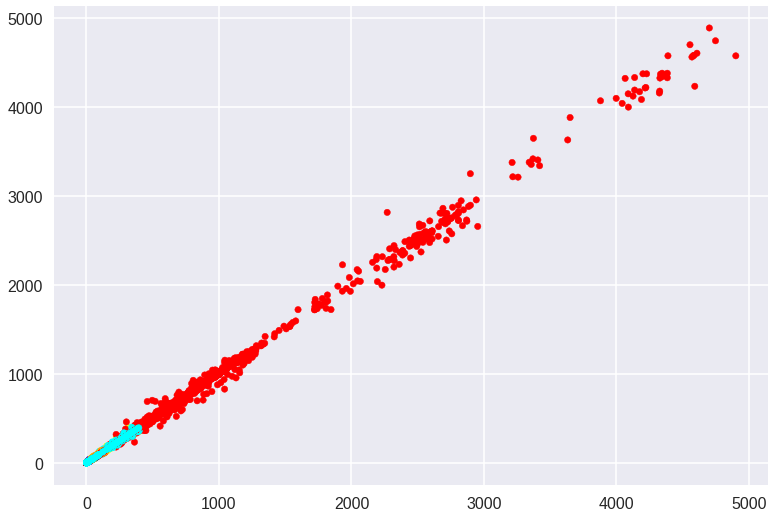

In [14]:
colors = np.array(['red','blue','green', 'yellow', 'orange', 'cyan', 'pink', 'purple', 'black', 'grey', 'teal', 'brown', 'navy', 'teal', 'lime'])
plt.scatter(ds['Open'], ds['Close'], c=colors[ds['Type']], s=40)
plt.show()

In [15]:
model = cluster.KMeans(n_clusters=15)

In [16]:
model.fit(ds[['Type', 'High', 'Low', 'Open', 'Close']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

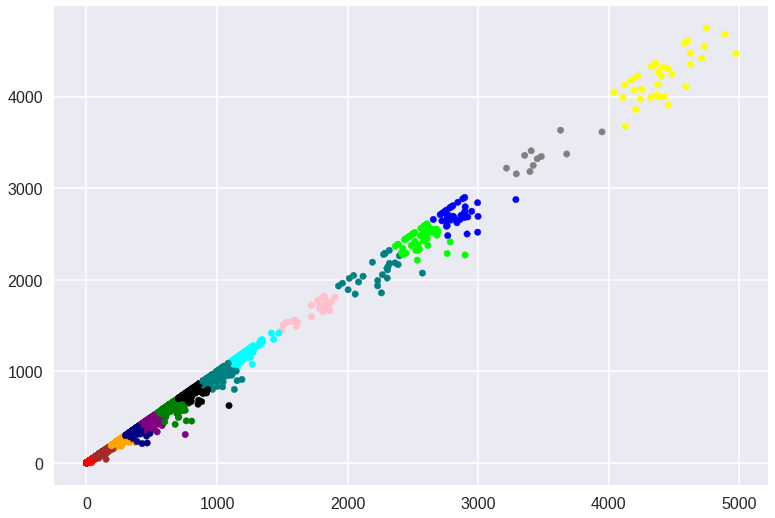

In [17]:
colors = np.array(['red','blue','green', 'yellow', 'orange', 'cyan', 'pink', 'purple', 'black', 'grey', 'teal', 'brown', 'navy', 'teal', 'lime'])
plt.scatter(ds['High'], ds['Low'], c=colors[model.labels_], s=40)
plt.show()

In [18]:
ds.replace({"Type":{14:"13", 13:"14", 12:"11", 11:"10", 10:"12", 9:"8", 8:"9", 7:"6", 6:"5", 5:"7", 4:"3", 3:"4", 2:"1", 1:"0", 0:"2"}}, inplace=True)
ds.replace({"Type":{"1":1, "0":0, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10":10, "11":11, "12":12, "13":13, "14":14}}, inplace=True)
import sklearn.metrics 
sklearn.metrics.accuracy_score(ds['Type'], model.labels_)

0.15699735948698604

In [19]:
sklearn.metrics.confusion_matrix(ds['Type'],model.labels_)

array([[1582,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          10,    0,    0,    0],
       [1494,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 768,   41,  444,   36,  476,   88,   24,  396,  180,   11,   26,
         283,  271,  126,   51],
       [1187,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          16,    0,    0,    0],
       [1121,    0,    0,    0,   55,    0,    0,    0,    0,    0,    0,
         110,   14,    0,    0],
       [ 889,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 461,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [1680,    0,    0,    0,  114,    0,    0,    0,    0,    0,    0,
          62,   83,    0,    0],
       [ 362,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 390,    0,    0,    0,    0,